# Decision Tree Classification

In this notebook, we discuss how to fit and evaluate a decision tree classification models in Python.

We will use the Breast Cancer Wisconsin Diagnostic dataset, which was downloaded from the UCI Machine Learning repository.

In [1]:
# Import data
import pandas as pd

df = pd.read_csv('wdbc.csv')
df.head()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_pts_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_pts_worst,symmetry_worst,fractal_dim_worst
0,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


The target variable is called `target`, and we want to use all remaining variables to try to predict it.

In [2]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X = df.drop('target', axis = 1)
y = df.target

# We specify the random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,
                                                    random_state = 1234)
(X_train.shape, X_test.shape)

((512, 30), (57, 30))

Decision tree classification can be fitted using `scikit-learn`, and the syntax should now look familiar. 

In [3]:
# Fit Decision Tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Get predicted values
y_pred = model.predict(X_test)
y_pred

array(['M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B',
       'M', 'M', 'M', 'B', 'M'], dtype=object)

### Exercise

Compute the F-score of this classification.

In [4]:
# Write your code below


By default the tree is unpruned: it was grown until each node is either pure or contains only two observations. We can find its depth and the number of leaves using the following methods.

In [5]:
model.get_depth()

7

In [6]:
model.get_n_leaves()

19

Since we have 512 training observations, this means we have an average of about 27 observations per leaf.

## Visualizing the tree

As you can imagine, `scikit-learn` also has functions for visualizing the decision tree. Let's look at it.

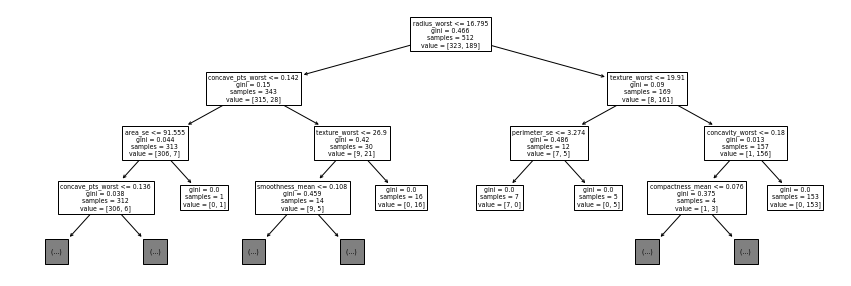

In [7]:
from matplotlib import pyplot as plt
from sklearn import tree

# Make the figure larger
plt.rcParams['figure.figsize'] = [15, 5]

# Specify the feature names using the column names of X_train
tree.plot_tree(model, max_depth = 3,
               feature_names = list(X_train.columns))
plt.show()


### Exercise

As you may have noticed from the figure, the splitting criterion is actually the Gini impurity index. Look at the documentation of `DecisionTreeClassifier` and change the splitting criterion to Information Gain.

In [8]:
# Write your code below




## Pruning the tree

To prune the tree, `scikit-learn` uses an algorithm called *Minimal Cost-Complexity Pruning*. The idea is based on regularization, which we have discussed for linear and logistic regression. We briefly discuss the mathematical details. 

For a given tree $T$ and a non-negative real number $\alpha > 0$, we can define its cost-complexity as follows:

$$R_\alpha(T) = R(T) + \alpha\lvert\tilde{T}\rvert.$$

$R(T)$ is the total weighted impurity at each leaf (weighted by the proportion of the training data ending in a particular leaf), and $\lvert\tilde{T}\rvert$ is the number of leaves. Minimal cost-complexity pruning finds the subtree $T^\prime$ of $T$ that minimizes $R_\alpha(T^\prime)$.

### Exercise 

The pruning process is controlled by the argument `ccp_alpha`. Choose a (non-negative) value of `ccp_alpha`, and refit the decision tree. 

Compute the F-score, the number of leaves, and the depth of the pruned tree.

In [9]:
# Write your code here


